In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load iris dataset
iris = load_iris()
X= iris.data[:,:2]
y = iris.target

In [4]:
import pandas as pd

In [5]:
pd.DataFrame(X)

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)
print(f'Accuracy :{accuracy_score(y_test,y_pred)}')

Accuracy :0.6333333333333333


In [15]:
# plotting decision tree
plt.figure(figsize=(120,80))
plot_tree(clf,filled=True, feature_names=iris.feature_names[:2],class_names=iris.target_names)
plt.show()

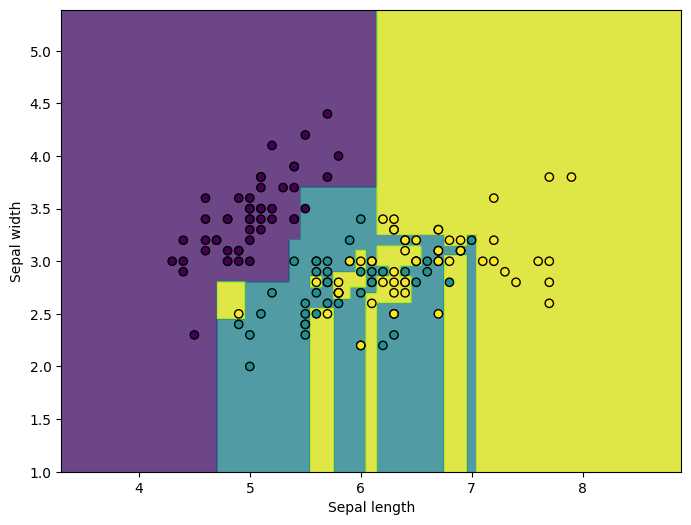

In [18]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [20]:
r = export_text(clf,feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- sepal_length <= 4.70
|   |   |   |--- class: 0
|   |   |--- sepal_length >  4.70
|   |   |   |--- sepal_length <= 4.95
|   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal_length >  4.95
|   |   |   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- sepal_length <= 5.35
|   |   |   |--- class: 0
|   |   |--- sepal_length >  5.35
|   |   |   |--- sepal_width <= 3.20
|   |   |   |   |--- class: 1
|   |   |   |--- sepal_width >  3.20
|   |   |   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- sepal_width <= 3.70
|   |   |   |--- sepal_length <= 5.75
|   |   |   |   |--- sepal_length <= 5.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_length >  5.55
|   |   |   |   |   |--- sepal_width <= 2.55
|   |   |   |   |   |   |--- class: 2
|   |   | 